In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the dataset

df = pd.read_csv("kaggle_survey_2017_2021.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle_survey_2017_2021.csv'

In [ ]:
df = df.iloc[1:]

In [ ]:
df["Q1"].unique()

array(['50-54', '22-24', '45-49', '25-29', '18-21', '30-34', '40-44',
       '35-39', '70+', '55-59', '60-69', nan], dtype=object)

In [ ]:
#Checking for missing values
df['Q1'].isna().sum()

np.int64(2296)

In [ ]:
df['Q1'] = df['Q1'].fillna('Unkown')

In [ ]:
#Order the caterogories 
age_order = [
    "18-21", "22-24", "25-29", "30-34", "35-39", 
    "40-44", "45-49", "50-54", "55-59","60-64", 
    "65-69", "70+", "Unkown"
]

df['Q1'] = pd.Categorical(df['Q1'], categories=age_order, ordered=True)

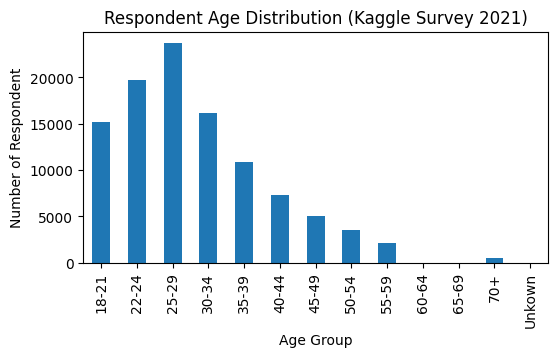

In [ ]:
#Counting and plotting 

age_counts = df['Q1'].value_counts().sort_index() 

age_counts.plot(kind='bar', figsize=(6,3))
plt.title("Respondent Age Distribution (Kaggle Survey 2021)")
plt.ylabel("Number of Respondent")
plt.xlabel("Age Group")
plt.show()

In [ ]:
df['Q2'] = df['Q2'].fillna('Unknown')

df['Q2'] = df['Q2'].replace({
    'Male' : 'Man',
    'Female' : 'Woman',
    'Man' : 'Man',
    'Woman': 'Woman',
    'Nonbinary': 'Non-Binary',
    'Non-binary, genderqueer, or gender non-conforming': 'Non-binary'

})


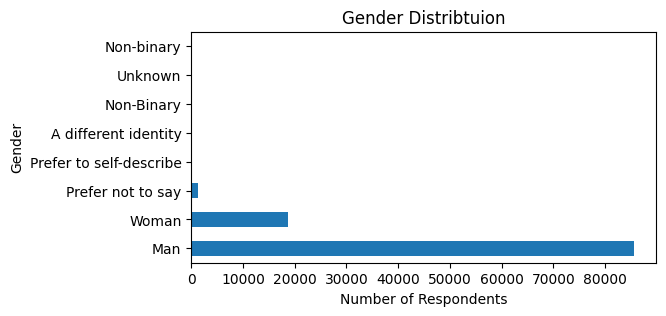

In [ ]:
gender_counts = df["Q2"].value_counts()

gender_counts.plot(kind='barh', figsize=(6,3))

plt.title("Gender Distribtuion")
plt.xlabel("Number of Respondents")
plt.ylabel("Gender")
plt.show()

C:\Users\Haris\AppData\Local\Temp\ipykernel_2832\1541109122.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




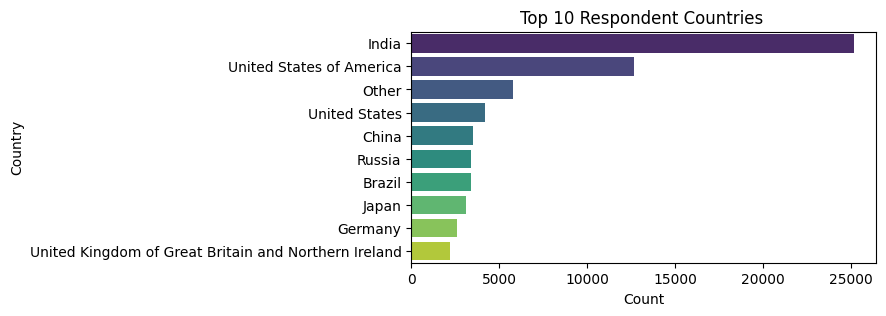

In [ ]:
country_counts = df['Q3'].value_counts().head(10)

plt.figure(figsize=(6,3))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Respondent Countries ')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [ ]:
df['Q4'].isna().sum()

np.int64(2983)

In [ ]:
df['Q4'] = df['Q4'].fillna('Unknown')

In [ ]:
df['Q4'].unique()

array(['Bachelorâ€™s degree', 'Masterâ€™s degree', 'Doctoral degree',
       'I prefer not to answer',
       'Some college/university study without earning a bachelorâ€™s degree',
       'No formal education past high school', 'Professional doctorate',
       'Professional degree', 'Unknown', "Bachelor's degree",
       "Master's degree",
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school'],
      dtype=object)

In [ ]:
edu_mapping = {
    'Bachelorâ€™s degree': "Bachelor's degree",
    'Masterâ€™s degree': "Master's degree",
    'Doctoral degree': "Doctoral degree",
    'Professional doctorate': "Professional degree",
    
    # Keep consistent
    "Bachelor's degree": "Bachelor's degree",
    "Master's degree": "Master's degree",
    
    'Some college/university study without earning a bachelorâ€™s degree': "Some college/university study",
    "Some college/university study without earning a bachelor's degree": "Some college/university study",
    
    'No formal education past high school': "No formal education",
    'I did not complete any formal education past high school': "No formal education",
    
    'Professional degree': "Professional degree",
    'I prefer not to answer': "Prefer not to answer",
    'Unknown': "Unknown"
}

df['Q4'] = df['Q4'].replace(edu_mapping)


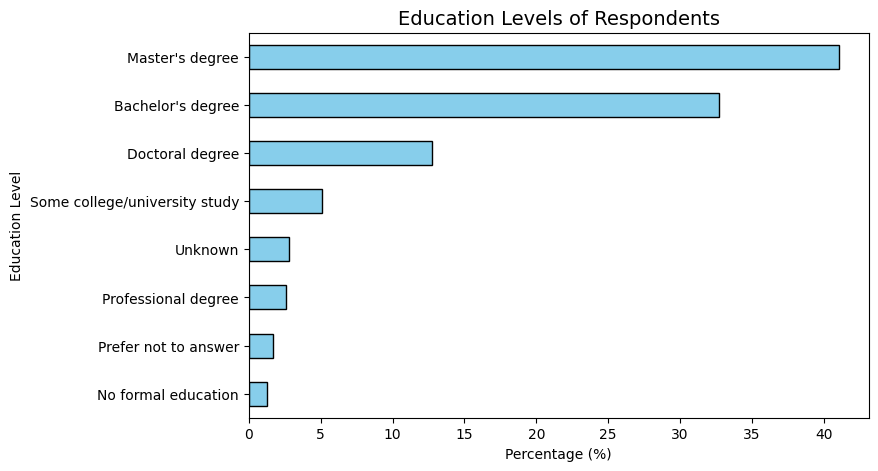

In [ ]:
edu_counts = df['Q4'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
edu_counts.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")

plt.title("Education Levels of Respondents", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("Education Level")
plt.show()


C:\Users\Haris\AppData\Local\Temp\ipykernel_2832\1012719936.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




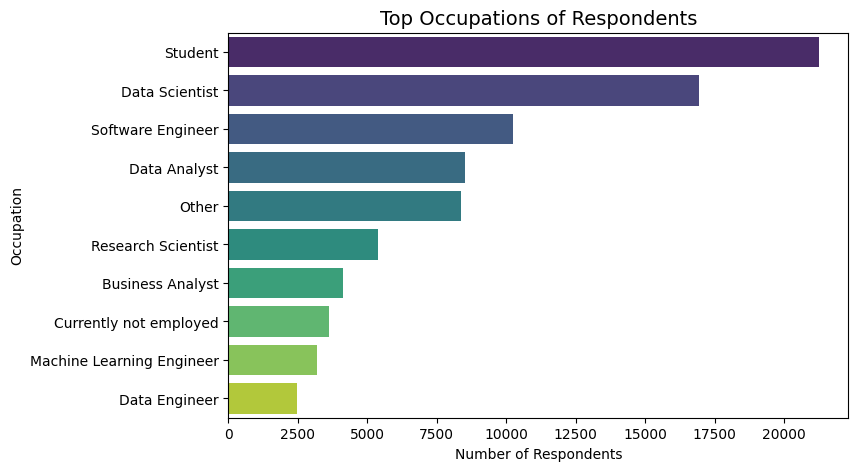

In [ ]:
# Q5 - Current Role/Occupation
role_counts = df['Q5'].value_counts().head(10)  # Top 10 roles

plt.figure(figsize=(8,5))
sns.barplot(x=role_counts.values, y=role_counts.index, palette="viridis")
plt.title("Top Occupations of Respondents", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel("Occupation")
plt.show()


C:\Users\Haris\AppData\Local\Temp\ipykernel_2832\3240765355.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




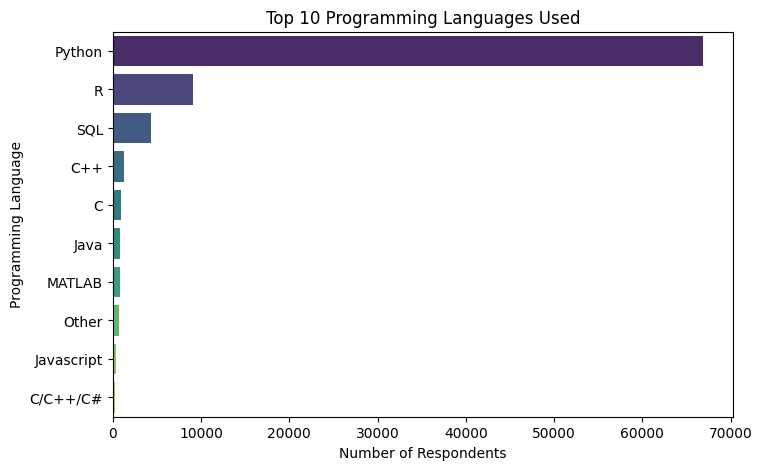

In [ ]:
# Split multiple answers in Q8
lang_series = df['Q8'].dropna().str.split(';')

# Flatten the list of lists into one big list
all_langs = [lang.strip() for sublist in lang_series for lang in sublist]

# Count occurrences
lang_counts = pd.Series(all_langs).value_counts().head(10)

# Plot top 10 languages
plt.figure(figsize=(8,5))
sns.barplot(x=lang_counts.values, y=lang_counts.index, palette="viridis")
plt.title("Top 10 Programming Languages Used")
plt.xlabel("Number of Respondents")
plt.ylabel("Programming Language")
plt.show()


C:\Users\Haris\AppData\Local\Temp\ipykernel_2832\2907763588.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




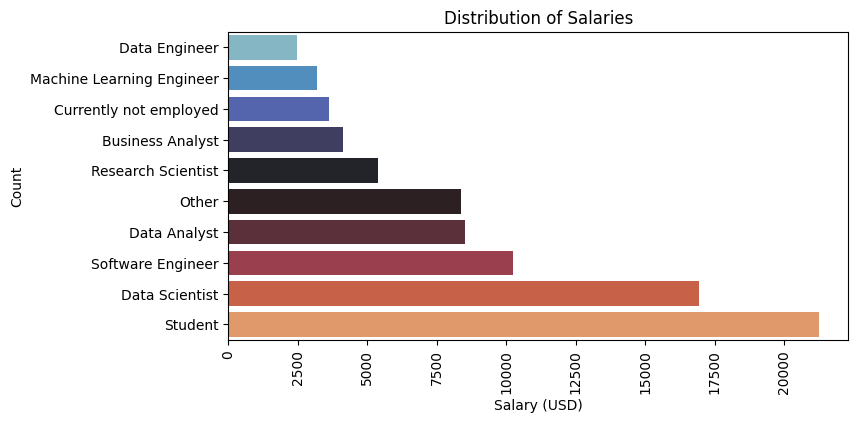

In [ ]:
salary_counts = df['Q5'].value_counts().head(10).sort_values(ascending=True)
plt.figure(figsize=(8,4))
sns.barplot(y=salary_counts.index, x=salary_counts.values, palette='icefire')
plt.title("Distribution of Salaries")
plt.xlabel("Salary (USD)")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()


In [ ]:


# Set global style
sns.set_theme(style="whitegrid", palette="Set2")

fig, axes = plt.subplots(3, 3, figsize=(20, 15))  # 3 rows, 3 cols
axes = axes.flatten()



# ---------- 2. Age Group ----------
age_counts = df['Q1'].value_counts().sort_index()
sns.barplot(y=age_counts.index, x=age_counts.values, ax=axes[0])
axes[1].set_title("Age Groups")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")

# ---------- 3. Country (Top 10) ----------
country_counts = df['Q3'].value_counts().head(10)
sns.barplot(y=country_counts.index, x=country_counts.values, ax=axes[1])
axes[2].set_title("Top 10 Countries")
axes[2].set_xlabel("Count")

# ---------- 4. Education ----------
edu_counts = df['Q4'].value_counts()
sns.barplot(y=edu_counts.index, x=edu_counts.values, ax=axes[2])
axes[3].set_title("Education Level")
axes[3].set_xlabel("Count")

# ---------- 5. Occupations (Top 10) ----------
occ_counts = df['Q5'].value_counts().head(10)
sns.barplot(y=occ_counts.index, x=occ_counts.values, ax=axes[3])
axes[4].set_title("Top 10 Occupations")
axes[4].set_xlabel("Count")

# ---------- 6. Programming Languages (Top 10) ----------
lang_counts = df['Q8'].value_counts().head(10)
sns.barplot(y=lang_counts.index, x=lang_counts.values, ax=axes[4])
axes[5].set_title("Top 10 Programming Languages")
axes[5].set_xlabel("Count")

# ---------- 7. Salary Distribution ----------
salary_counts = df['Q25'].value_counts().head(10)
sns.barplot(y=salary_counts.index, x=salary_counts.values, ax=axes[5])
axes[6].set_title("Salary Distribution (Top 10)")
axes[6].set_xlabel("Count")

gender_counts = df['Q2'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[6])
axes[0].set_title("Gender Distribution")
axes[0].set_ylabel("Count")


# Remove unused plots (if any)
for i in range(7, 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined